# DSGA-1011 Homework 1

## Load the Data

In [178]:
import os
from random import *
from nose.tools import assert_equal
from tqdm import tqdm_notebook
import pickle as pkl
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from nltk import ngrams
import matplotlib.pyplot as plt
import spacy
import string
from collections import Counter

In [2]:
# Import data
train_pos_path = './aclImdb/train/pos/'
train_neg_path = './aclImdb/train/neg/'
test_pos_path = './aclImdb/test/pos/'
test_neg_path = './aclImdb/test/neg/'

# merge the file contents into the list
# assign 1 to positive reviews and 0 to negatie reviews
def file2list(path,y):
    file2list = []
    for file in os.listdir(path):
        with open(path+file,'r') as filecontent:
            file2list.append((filecontent.read(),y))    
    return file2list

train_pos = file2list(train_pos_path,1)
train_neg = file2list(train_neg_path,0)
test_pos = file2list(test_pos_path,1)
test_neg = file2list(test_neg_path,0)

In [3]:
# Check the size of each loaded list
print('The size of train_pos is {}'.format(len(train_pos)))
print('The size of train_neg is {}'.format(len(train_neg)))
print('The size of test_pos is {}'.format(len(test_pos)))
print('The size of test_neg is {}'.format(len(test_neg)))

The size of train_pos is 12500
The size of train_neg is 12500
The size of test_pos is 12500
The size of test_neg is 12500


In [4]:
def get_data_target(dataset_pos,dataset_neg):
    dataset = dataset_pos + dataset_neg
    dataset_data = []
    dataset_target = []
    for review in dataset:
        dataset_data.append(review[0])
        dataset_target.append(review[1])
    return dataset_data, dataset_target

train_data1, train_target = get_data_target(train_pos,train_neg)
test_data, test_target = get_data_target(test_pos,test_neg)

In [5]:
# check data and targets are created correctly 
# no errors should rise
a = randint(0,len(train_pos))
b = 12500 + a
assert_equal(train_pos[a][0],train_data1[a])
assert_equal(train_neg[a][0],train_data1[b])
assert_equal(test_pos[a][0],test_data[a])
assert_equal(test_neg[a][0],test_data[b])

In [6]:
print('The size of train_data is {}'.format(len(train_data1)))
print('The size of train_target is {}'.format(len(train_target)))
print('The size of test_data is {}'.format(len(test_data)))
print('The size of test_target is {}'.format(len(test_target)))

The size of train_data is 25000
The size of train_target is 25000
The size of test_data is 25000
The size of test_target is 25000


In [7]:
# Split train data into actual train and validation sets
train_split = 20000
train_data = train_data1[:train_split]
train_targets = train_target[:train_split]

val_data = train_data1[train_split:]
val_targets = train_target[train_split:]

test_data = test_data
test_targets = test_target

print ("Train dataset size is {}".format(len(train_data)))
print ("Validation dataset size is {}".format(len(val_data)))
print ("Test dataset size is {}".format(len(test_data)))

Train dataset size is 20000
Validation dataset size is 5000
Test dataset size is 25000


In [8]:
# Remove HTML tag
train_data = [s.replace('<br />', ' ') for s in train_data]
train_data = [s.replace('  ', ' ') for s in train_data]

val_data = [s.replace('<br />', ' ') for s in val_data]
val_data = [s.replace('  ', ' ') for s in val_data]

test_data = [s.replace('<br />', ' ') for s in test_data]
test_data = [s.replace('  ', ' ') for s in test_data]

In [9]:
# Random sample from train dataset
import random
print (train_data[random.randint(0, len(train_data) - 1)])

Oh, the sixties. There were some interesting films. I was more of a movie goer then. I now enjoy renting movies and relaxing in my home rather than going to the theater. I also saw this short film, " The Legend of the Boy and the Eagle". I have been searching for this film for years. It was truly inspiring. Surprisingly, I was finally able to gather more information from your site. Thank You........ I'm surprised to find out that this short film was an opening for a Disney picture. I too did not remember the Disney film. I did not even remember that it was an opening film for Disney. I truly wish they would show this on TV sometime. I wonder if Disey holds the rights to this film? Is it available on DVD? This is a must see for all generations!!!


## Tokenization

## 1-gram

In [10]:
# Let's write the tokenization function 
# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]

In [11]:
# Alternatively try running the following multi-threaded version of tokenization
# Credit to Ilya Kulikov
def lower_case_remove_punc(parsed):
    return [token.text.lower() for token in parsed if (token.text not in punctuations)]


def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset
    # in order to create vocabulary later
    all_tokens = []

    for sample in tqdm_notebook(tokenizer.pipe(dataset, disable=['parser', 'tagger', 'ner'], 
                                               batch_size=512, n_threads=1)):
        tokens = lower_case_remove_punc(sample)

        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens



In [ ]:
#train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

#val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))

In [ ]:
# No HTML
#train set tokens
print ("Tokenizing train data")
train_data_tokens_noHTML, all_train_tokens_noHTML = tokenize_dataset(train_data)
pkl.dump(train_data_tokens_noHTML, open("train_data_tokens_noHTML.p", "wb"))
pkl.dump(all_train_tokens_noHTML, open("all_train_tokens_noHTML.p", "wb"))

#val set tokens
print ("Tokenizing val data")
val_data_tokens_noHTML, _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens_noHTML, open("val_data_tokens_noHTML.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_noHTML, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens_noHTML, open("test_data_tokens_noHTML.p", "wb"))

In [22]:
# Then, load preprocessed train, val and test datasets
train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 4827560


In [31]:
# No HTML
# Then, load preprocessed train, val and test datasets
train_data_tokens = pkl.load(open("train_data_tokens_noHTML.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens_noHTML.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens_noHTML.p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens_noHTML.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 4780483


In [32]:
max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [33]:
# Lets check the dictionary by loading random token from it

random_token_id = randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 8187 ; token forgets
Token forgets; token id 8187


In [34]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


## Pytorch Dataloader

In [35]:
MAX_SENTENCE_LENGTH = 500

import numpy as np
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = IMDBDataset(train_data_indices, train_targets)
#val_loader = IMDBDataset(val_data_indices, val_targets)
#test_loader = IMDBDataset(test_data_indices, test_targets)

BATCH_SIZE = 50
train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

# for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

## Bag-of-Words Model

In [36]:
class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out


In [37]:
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

In [38]:
learning_rate = 0.01
num_epochs = 5 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/5], Step: [101/400], Validation Acc: 70.24
Epoch: [1/5], Step: [201/400], Validation Acc: 84.54
Epoch: [1/5], Step: [301/400], Validation Acc: 86.72
Epoch: [2/5], Step: [101/400], Validation Acc: 79.76
Epoch: [2/5], Step: [201/400], Validation Acc: 73.12
Epoch: [2/5], Step: [301/400], Validation Acc: 86.66
Epoch: [3/5], Step: [101/400], Validation Acc: 85.96
Epoch: [3/5], Step: [201/400], Validation Acc: 80.36
Epoch: [3/5], Step: [301/400], Validation Acc: 79.72
Epoch: [4/5], Step: [101/400], Validation Acc: 83.18
Epoch: [4/5], Step: [201/400], Validation Acc: 80.58
Epoch: [4/5], Step: [301/400], Validation Acc: 83.42
Epoch: [5/5], Step: [101/400], Validation Acc: 87.74
Epoch: [5/5], Step: [201/400], Validation Acc: 84.46
Epoch: [5/5], Step: [301/400], Validation Acc: 83.72


In [42]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))

After training for 5 epochs
Val Acc 83.16


## Bag-of-N-Grams


In [41]:
# tokenization for n-grams
def lower_case_remove_punc(parsed):
    return [token.text.lower() for token in parsed if (token.text not in punctuations)]

def tokenize_dataset(dataset,n):
    token_dataset = []
    # we are keeping track of all tokens in dataset
    # in order to create vocabulary later
    all_tokens = []

    for sample in tqdm_notebook(tokenizer.pipe(dataset, disable=['parser', 'tagger', 'ner'], 
                                               batch_size=512, n_threads=1)):
        tokens = lower_case_remove_punc(sample)
        n_gram_token = list(ngrams(tokens, n))
        token_dataset.append(n_gram_token)
        all_tokens += n_gram_token
        
    return token_dataset, all_tokens

## 2-grams ( not include 1-gram )

In [44]:
# 2-grams without including 1-gram
#train set tokens
print ("Tokenizing train data")
train_data_tokens_2grams_alone, all_train_tokens_2grams_alone = tokenize_dataset(train_data,2)

#all_train_tokens_2grams = all_train_tokens_2grams + all_train_tokens

pkl.dump(train_data_tokens_2grams_alone, open("train_data_tokens_2grams_alone.p", "wb"))
pkl.dump(all_train_tokens_2grams_alone, open("all_train_tokens_2grams_alone.p", "wb"))


#val set tokens
print ("Tokenizing val data")
val_data_tokens_2grams_alone, _ = tokenize_dataset(val_data,2)
pkl.dump(val_data_tokens_2grams_alone, open("val_data_tokens_2grams_alone.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_2grams_alone, _ = tokenize_dataset(test_data,2)
pkl.dump(test_data_tokens_2grams_alone, open("test_data_tokens_2grams_alone.p", "wb"))

Tokenizing train data



Tokenizing val data



Tokenizing test data


In [81]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_2grams_alone = pkl.load(open("train_data_tokens_2grams_alone.p", "rb"))
all_train_tokens_2grams_alone = pkl.load(open("all_train_tokens_2grams_alone.p", "rb"))

val_data_tokens_2grams_alone = pkl.load(open("val_data_tokens_2grams_alone.p", "rb"))
test_data_tokens_2grams_alone = pkl.load(open("test_data_tokens_2grams_alone.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens_2grams_alone)))
print ("Val dataset size is {}".format(len(val_data_tokens_2grams_alone)))
print ("Test dataset size is {}".format(len(test_data_tokens_2grams_alone)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens_2grams_alone)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 4765134


In [82]:
from collections import Counter

max_vocab_size = 50000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens_2grams_alone)

In [83]:
# Lets check the dictionary by loading random token from it

random_token_id = randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; Token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; Token id {}".format(random_token, token2id[random_token]))

Token id 27578 ; Token ('people', 'so')
Token ('people', 'so'); Token id 27578


In [84]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens_2grams_alone)
val_data_indices = token2index_dataset(val_data_tokens_2grams_alone)
test_data_indices = token2index_dataset(test_data_tokens_2grams_alone)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [87]:
MAX_SENTENCE_LENGTH = 500

import numpy as np
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = IMDBDataset(train_data_indices, train_targets)
#val_loader = IMDBDataset(val_data_indices, val_targets)
#test_loader = IMDBDataset(test_data_indices, test_targets)

BATCH_SIZE = 50
train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

# for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

In [88]:
class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out


In [89]:
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

In [90]:
learning_rate = 0.01
num_epochs = 5 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/5], Step: [101/400], Validation Acc: 29.04
Epoch: [1/5], Step: [201/400], Validation Acc: 73.6
Epoch: [1/5], Step: [301/400], Validation Acc: 79.32
Epoch: [2/5], Step: [101/400], Validation Acc: 79.42
Epoch: [2/5], Step: [201/400], Validation Acc: 76.42
Epoch: [2/5], Step: [301/400], Validation Acc: 83.34
Epoch: [3/5], Step: [101/400], Validation Acc: 82.64
Epoch: [3/5], Step: [201/400], Validation Acc: 79.82
Epoch: [3/5], Step: [301/400], Validation Acc: 79.26
Epoch: [4/5], Step: [101/400], Validation Acc: 82.7
Epoch: [4/5], Step: [201/400], Validation Acc: 82.78
Epoch: [4/5], Step: [301/400], Validation Acc: 82.66
Epoch: [5/5], Step: [101/400], Validation Acc: 81.86
Epoch: [5/5], Step: [201/400], Validation Acc: 82.48
Epoch: [5/5], Step: [301/400], Validation Acc: 83.28


In [91]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))

After training for 5 epochs
Val Acc 81.78


## 2-grams ( include 1-gram )

In [64]:
# 2-grams
#train set tokens
print ("Tokenizing train data")
train_data_tokens_2grams, all_train_tokens_2grams = tokenize_dataset(train_data,2)

all_train_tokens_2grams = all_train_tokens_2grams + all_train_tokens

pkl.dump(train_data_tokens_2grams, open("train_data_tokens_2grams.p", "wb"))
pkl.dump(all_train_tokens_2grams, open("all_train_tokens_2grams.p", "wb"))


#val set tokens
print ("Tokenizing val data")
val_data_tokens_2grams, _ = tokenize_dataset(val_data,2)
pkl.dump(val_data_tokens_2grams, open("val_data_tokens_2grams.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_2grams, _ = tokenize_dataset(test_data,2)
pkl.dump(test_data_tokens_2grams, open("test_data_tokens_2grams.p", "wb"))

Tokenizing train data



Tokenizing val data



Tokenizing test data


In [65]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_2grams = pkl.load(open("train_data_tokens_2grams.p", "rb"))
all_train_tokens_2grams = pkl.load(open("all_train_tokens_2grams.p", "rb"))

val_data_tokens_2grams = pkl.load(open("val_data_tokens_2grams.p", "rb"))
test_data_tokens_2grams = pkl.load(open("test_data_tokens_2grams.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens_2grams)))
print ("Val dataset size is {}".format(len(val_data_tokens_2grams)))
print ("Test dataset size is {}".format(len(test_data_tokens_2grams)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens_2grams)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 9545617


In [66]:
token2id_2grams, id2token_2grams = build_vocab(all_train_tokens_2grams)

In [67]:
random_token_id = randint(0, len(id2token_2grams)-1)
random_token = id2token_2grams[random_token_id]

print ("Token id {} ; Token {}".format(random_token_id, id2token_2grams[random_token_id]))
print ("Token {}; Token id {}".format(random_token, token2id_2grams[random_token]))

Token id 11346 ; Token ('save', 'this')
Token ('save', 'this'); Token id 11346


In [68]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id_2grams[token] if token in token2id_2grams else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices_2grams = token2index_dataset(train_data_tokens_2grams)
val_data_indices_2grams = token2index_dataset(val_data_tokens_2grams)
test_data_indices_2grams = token2index_dataset(test_data_tokens_2grams)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices_2grams)))
print ("Val dataset size is {}".format(len(val_data_indices_2grams)))
print ("Test dataset size is {}".format(len(test_data_indices_2grams)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [75]:
MAX_SENTENCE_LENGTH = 500

import numpy as np
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = IMDBDataset(train_data_indices, train_targets)
#val_loader = IMDBDataset(val_data_indices, val_targets)
#test_loader = IMDBDataset(test_data_indices, test_targets)

BATCH_SIZE = 50
train_dataset = IMDBDataset(train_data_indices_2grams, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(val_data_indices_2grams, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices_2grams, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

# for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

In [76]:
class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out


In [77]:
emb_dim = 100
model = BagOfWords(len(id2token_2grams), emb_dim)

In [78]:
learning_rate = 0.01
num_epochs = 5 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/5], Step: [101/400], Validation Acc: 26.74
Epoch: [1/5], Step: [201/400], Validation Acc: 77.38
Epoch: [1/5], Step: [301/400], Validation Acc: 65.54
Epoch: [2/5], Step: [101/400], Validation Acc: 78.22
Epoch: [2/5], Step: [201/400], Validation Acc: 75.5
Epoch: [2/5], Step: [301/400], Validation Acc: 82.0
Epoch: [3/5], Step: [101/400], Validation Acc: 77.54
Epoch: [3/5], Step: [201/400], Validation Acc: 79.52
Epoch: [3/5], Step: [301/400], Validation Acc: 78.96
Epoch: [4/5], Step: [101/400], Validation Acc: 84.98
Epoch: [4/5], Step: [201/400], Validation Acc: 83.24
Epoch: [4/5], Step: [301/400], Validation Acc: 84.08
Epoch: [5/5], Step: [101/400], Validation Acc: 81.88
Epoch: [5/5], Step: [201/400], Validation Acc: 81.12
Epoch: [5/5], Step: [301/400], Validation Acc: 81.8


In [80]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))

After training for 5 epochs
Val Acc 82.7


## Vary N to generate Bag-of-N-Grams

### N = 2

In [ ]:
# 2-grams
#train set tokens
print ("Tokenizing train data")
train_data_tokens_2grams, all_train_tokens_2grams = tokenize_dataset(train_data,2)

all_train_tokens_2grams = all_train_tokens_2grams + all_train_tokens

pkl.dump(train_data_tokens_2grams, open("train_data_tokens_2grams.p", "wb"))
pkl.dump(all_train_tokens_2grams, open("all_train_tokens_2grams.p", "wb"))


#val set tokens
print ("Tokenizing val data")
val_data_tokens_2grams, _ = tokenize_dataset(val_data,2)
pkl.dump(val_data_tokens_2grams, open("val_data_tokens_2grams.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_2grams, _ = tokenize_dataset(test_data,2)
pkl.dump(test_data_tokens_2grams, open("test_data_tokens_2grams.p", "wb"))




In [102]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_2grams = pkl.load(open("train_data_tokens_2grams.p", "rb"))
all_train_tokens_2grams = pkl.load(open("all_train_tokens_2grams.p", "rb"))

val_data_tokens_2grams = pkl.load(open("val_data_tokens_2grams.p", "rb"))
test_data_tokens_2grams = pkl.load(open("test_data_tokens_2grams.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens_2grams)))
print ("Val dataset size is {}".format(len(val_data_tokens_2grams)))
print ("Test dataset size is {}".format(len(test_data_tokens_2grams)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens_2grams)))

token2id, id2token = build_vocab(all_train_tokens_2grams)

# Lets check the dictionary by loading random token from it

random_token_id = randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; Token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; Token id {}".format(random_token, token2id[random_token]))

# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens_2grams)
val_data_indices = token2index_dataset(val_data_tokens_2grams)
test_data_indices = token2index_dataset(test_data_tokens_2grams)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 9545617
Token id 29720 ; Token ('of', 'originality')
Token ('of', 'originality'); Token id 29720
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [103]:
MAX_SENTENCE_LENGTH = 500

import numpy as np
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = IMDBDataset(train_data_indices, train_targets)
#val_loader = IMDBDataset(val_data_indices, val_targets)
#test_loader = IMDBDataset(test_data_indices, test_targets)

BATCH_SIZE = 50
train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

# for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

In [104]:
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

In [105]:
learning_rate = 0.01
num_epochs = 5 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/5], Step: [101/400], Validation Acc: 54.3
Epoch: [1/5], Step: [201/400], Validation Acc: 75.06
Epoch: [1/5], Step: [301/400], Validation Acc: 69.42
Epoch: [2/5], Step: [101/400], Validation Acc: 83.52
Epoch: [2/5], Step: [201/400], Validation Acc: 76.72
Epoch: [2/5], Step: [301/400], Validation Acc: 87.6
Epoch: [3/5], Step: [101/400], Validation Acc: 81.12
Epoch: [3/5], Step: [201/400], Validation Acc: 82.68
Epoch: [3/5], Step: [301/400], Validation Acc: 88.56
Epoch: [4/5], Step: [101/400], Validation Acc: 82.42
Epoch: [4/5], Step: [201/400], Validation Acc: 81.28
Epoch: [4/5], Step: [301/400], Validation Acc: 80.0
Epoch: [5/5], Step: [101/400], Validation Acc: 82.32
Epoch: [5/5], Step: [201/400], Validation Acc: 82.16
Epoch: [5/5], Step: [301/400], Validation Acc: 80.62


In [106]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))

After training for 5 epochs
Val Acc 81.36


## N = 3

In [ ]:
# 3-grams
#train set tokens
print ("Tokenizing train data")
train_data_tokens_3grams, all_train_tokens_3grams = tokenize_dataset(train_data,3)

all_train_tokens_3grams = all_train_tokens_3grams + all_train_tokens_2grams

pkl.dump(train_data_tokens_3grams, open("train_data_tokens_3grams.p", "wb"))
pkl.dump(all_train_tokens_3grams, open("all_train_tokens_3grams.p", "wb"))


#val set tokens
print ("Tokenizing val data")
val_data_tokens_3grams, _ = tokenize_dataset(val_data,3)

pkl.dump(val_data_tokens_3grams, open("val_data_tokens_3grams.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_3grams, _ = tokenize_dataset(test_data,3)

pkl.dump(test_data_tokens_3grams, open("test_data_tokens_3grams.p", "wb"))

In [107]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_3grams = pkl.load(open("train_data_tokens_3grams.p", "rb"))
all_train_tokens_3grams = pkl.load(open("all_train_tokens_3grams.p", "rb"))

val_data_tokens_3grams = pkl.load(open("val_data_tokens_3grams.p", "rb"))
test_data_tokens_3grams = pkl.load(open("test_data_tokens_3grams.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens_3grams)))
print ("Val dataset size is {}".format(len(val_data_tokens_3grams)))
print ("Test dataset size is {}".format(len(test_data_tokens_3grams)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens_3grams)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 14422680


In [108]:
token2id, id2token = build_vocab(all_train_tokens_3grams)

# Lets check the dictionary by loading random token from it

random_token_id = randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; Token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; Token id {}".format(random_token, token2id[random_token]))

# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens_3grams)
val_data_indices = token2index_dataset(val_data_tokens_3grams)
test_data_indices = token2index_dataset(test_data_tokens_3grams)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Token id 24901 ; Token ('acts', 'as')
Token ('acts', 'as'); Token id 24901
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [109]:
MAX_SENTENCE_LENGTH = 500

import numpy as np
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = IMDBDataset(train_data_indices, train_targets)
#val_loader = IMDBDataset(val_data_indices, val_targets)
#test_loader = IMDBDataset(test_data_indices, test_targets)

BATCH_SIZE = 50
train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

# for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

In [110]:
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

In [111]:
learning_rate = 0.01
num_epochs = 5 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/5], Step: [101/400], Validation Acc: 7.74
Epoch: [1/5], Step: [201/400], Validation Acc: 12.2
Epoch: [1/5], Step: [301/400], Validation Acc: 64.1
Epoch: [2/5], Step: [101/400], Validation Acc: 75.76
Epoch: [2/5], Step: [201/400], Validation Acc: 60.92
Epoch: [2/5], Step: [301/400], Validation Acc: 70.28
Epoch: [3/5], Step: [101/400], Validation Acc: 73.3
Epoch: [3/5], Step: [201/400], Validation Acc: 65.38
Epoch: [3/5], Step: [301/400], Validation Acc: 68.48
Epoch: [4/5], Step: [101/400], Validation Acc: 65.4
Epoch: [4/5], Step: [201/400], Validation Acc: 70.0
Epoch: [4/5], Step: [301/400], Validation Acc: 73.74
Epoch: [5/5], Step: [101/400], Validation Acc: 73.46
Epoch: [5/5], Step: [201/400], Validation Acc: 76.66
Epoch: [5/5], Step: [301/400], Validation Acc: 69.64


In [112]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))

After training for 5 epochs
Val Acc 64.9


## N = 4

In [ ]:
# 4-grams
#train set tokens
print ("Tokenizing train data")
train_data_tokens_4grams, all_train_tokens_4grams = tokenize_dataset(train_data,4)

all_train_tokens_4grams = all_train_tokens_4grams + all_train_tokens_3grams

pkl.dump(train_data_tokens_4grams, open("train_data_tokens_4grams.p", "wb"))
pkl.dump(all_train_tokens_4grams, open("all_train_tokens_4grams.p", "wb"))


#val set tokens
print ("Tokenizing val data")
val_data_tokens_4grams, _ = tokenize_dataset(val_data,4)

pkl.dump(val_data_tokens_4grams, open("val_data_tokens_4grams.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_4grams, _ = tokenize_dataset(test_data,4)

pkl.dump(test_data_tokens_4grams, open("test_data_tokens_4grams.p", "wb"))

In [113]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_4grams = pkl.load(open("train_data_tokens_4grams.p", "rb"))
all_train_tokens_4grams = pkl.load(open("all_train_tokens_4grams.p", "rb"))

val_data_tokens_4grams = pkl.load(open("val_data_tokens_4grams.p", "rb"))
test_data_tokens_4grams = pkl.load(open("test_data_tokens_4grams.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens_4grams)))
print ("Val dataset size is {}".format(len(val_data_tokens_4grams)))
print ("Test dataset size is {}".format(len(test_data_tokens_4grams)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens_4grams)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 19190240


In [114]:
token2id, id2token = build_vocab(all_train_tokens_4grams)

In [115]:
# Lets check the dictionary by loading random token from it

random_token_id = randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; Token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; Token id {}".format(random_token, token2id[random_token]))

# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens_4grams)
val_data_indices = token2index_dataset(val_data_tokens_4grams)
test_data_indices = token2index_dataset(test_data_tokens_4grams)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Token id 22785 ; Token ('year', 'i')
Token ('year', 'i'); Token id 22785
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [116]:
MAX_SENTENCE_LENGTH = 500

import numpy as np
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = IMDBDataset(train_data_indices, train_targets)
#val_loader = IMDBDataset(val_data_indices, val_targets)
#test_loader = IMDBDataset(test_data_indices, test_targets)

BATCH_SIZE = 50
train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

# for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

In [117]:
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

In [120]:
learning_rate = 0.01
num_epochs = 5 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/5], Step: [101/400], Validation Acc: 57.06
Epoch: [1/5], Step: [201/400], Validation Acc: 54.92
Epoch: [1/5], Step: [301/400], Validation Acc: 58.9
Epoch: [2/5], Step: [101/400], Validation Acc: 48.54
Epoch: [2/5], Step: [201/400], Validation Acc: 48.72
Epoch: [2/5], Step: [301/400], Validation Acc: 57.38
Epoch: [3/5], Step: [101/400], Validation Acc: 56.74
Epoch: [3/5], Step: [201/400], Validation Acc: 78.6
Epoch: [3/5], Step: [301/400], Validation Acc: 48.42
Epoch: [4/5], Step: [101/400], Validation Acc: 47.6
Epoch: [4/5], Step: [201/400], Validation Acc: 61.1
Epoch: [4/5], Step: [301/400], Validation Acc: 52.9
Epoch: [5/5], Step: [101/400], Validation Acc: 55.76
Epoch: [5/5], Step: [201/400], Validation Acc: 52.92
Epoch: [5/5], Step: [301/400], Validation Acc: 53.12


In [121]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))

After training for 5 epochs
Val Acc 52.52


## Bag-of-2-Grams model
### Vary the vocabulary size

In [123]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_2grams = pkl.load(open("train_data_tokens_2grams.p", "rb"))
all_train_tokens_2grams = pkl.load(open("all_train_tokens_2grams.p", "rb"))

val_data_tokens_2grams = pkl.load(open("val_data_tokens_2grams.p", "rb"))
test_data_tokens_2grams = pkl.load(open("test_data_tokens_2grams.p", "rb"))

In [160]:
size = [10000,15000,20000,25000,30000]

In [161]:
def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for i in range(len(size)):
    max_vocab_size = int(size[i])
    PAD_IDX = 0
    UNK_IDX = 1
    token2id, id2token = build_vocab(all_train_tokens_2grams)
    
    # convert token to id in the dataset
    train_data_indices = token2index_dataset(train_data_tokens_2grams)
    val_data_indices = token2index_dataset(val_data_tokens_2grams)
    test_data_indices = token2index_dataset(test_data_tokens_2grams)
    
    train_dataset = IMDBDataset(train_data_indices, train_targets)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

    val_dataset = IMDBDataset(val_data_indices, val_targets)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=IMDB_collate_func,
                                               shuffle=True)

    test_dataset = IMDBDataset(test_data_indices, test_targets)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=IMDB_collate_func,
                                               shuffle=False)
    emb_dim = 100
    model = BagOfWords(len(id2token), emb_dim)
    learning_rate = 0.01
    num_epochs = 5 # number epoch to train
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    print("-"*20)
    print('Vocabulary Size = ',size[i])
    

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    print ("After training for {} epochs".format(num_epochs))
    print ("Val Acc {}".format(test_model(val_loader, model)))
    print('\n'*3)

--------------------
Vocabulary Size =  10000
Epoch: [1/5], Step: [101/400], Validation Acc: 83.1
Epoch: [1/5], Step: [201/400], Validation Acc: 72.72
Epoch: [1/5], Step: [301/400], Validation Acc: 70.54
Epoch: [2/5], Step: [101/400], Validation Acc: 72.34
Epoch: [2/5], Step: [201/400], Validation Acc: 80.1
Epoch: [2/5], Step: [301/400], Validation Acc: 75.36
Epoch: [3/5], Step: [101/400], Validation Acc: 73.56
Epoch: [3/5], Step: [201/400], Validation Acc: 80.48
Epoch: [3/5], Step: [301/400], Validation Acc: 76.02
Epoch: [4/5], Step: [101/400], Validation Acc: 68.86
Epoch: [4/5], Step: [201/400], Validation Acc: 77.34
Epoch: [4/5], Step: [301/400], Validation Acc: 77.94
Epoch: [5/5], Step: [101/400], Validation Acc: 74.0
Epoch: [5/5], Step: [201/400], Validation Acc: 75.28
Epoch: [5/5], Step: [301/400], Validation Acc: 75.66
After training for 5 epochs
Val Acc 71.78




--------------------
Vocabulary Size =  15000
Epoch: [1/5], Step: [101/400], Validation Acc: 53.04
Epoch: [1/5], Ste

## Bag-of-2-Grams model
### Vocabulary Size = 30000
### Vary the embedding size

In [165]:
size = [100,300,500]

In [ ]:
max_vocab_size = 30000
PAD_IDX = 0
UNK_IDX = 1
def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens_2grams)

# convert token to id in the dataset
train_data_indices = token2index_dataset(train_data_tokens_2grams)
val_data_indices = token2index_dataset(val_data_tokens_2grams)
test_data_indices = token2index_dataset(test_data_tokens_2grams)

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=IMDB_collate_func,
                                       shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)
for i in range(len(size)):
    emb_dim = 0.05
    model = BagOfWords(len(id2token), emb_dim)
    learning_rate = 0.01
    num_epochs = 5 # number epoch to train
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    print("-"*20)
    print('Embedding Size = ',size[i])

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    print ("After training for {} epochs".format(num_epochs))
    print ("Val Acc {}".format(test_model(val_loader, model)))
    print('\n'*2)

## Bag-of-2-Grams model
### Vocabulary Size = 30000
### Embedding Size = 100
### Vary optimization hyperparameters

In [173]:
max_vocab_size = 30000
PAD_IDX = 0
UNK_IDX = 1
def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens_2grams)

# convert token to id in the dataset
train_data_indices = token2index_dataset(train_data_tokens_2grams)
val_data_indices = token2index_dataset(val_data_tokens_2grams)
test_data_indices = token2index_dataset(test_data_tokens_2grams)

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=IMDB_collate_func,
                                       shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)
learning_rate = 0.01
num_epochs = 5 # number epoch to train
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
print ("After training for {} epochs".format(num_epochs))
print('By using Adam')
print ("Val Acc {}".format(test_model(val_loader, model)))

Epoch: [1/5], Step: [101/400], Validation Acc: 50.4
Epoch: [1/5], Step: [201/400], Validation Acc: 66.56
Epoch: [1/5], Step: [301/400], Validation Acc: 85.34
Epoch: [2/5], Step: [101/400], Validation Acc: 72.04
Epoch: [2/5], Step: [201/400], Validation Acc: 82.98
Epoch: [2/5], Step: [301/400], Validation Acc: 82.48
Epoch: [3/5], Step: [101/400], Validation Acc: 74.0
Epoch: [3/5], Step: [201/400], Validation Acc: 84.04
Epoch: [3/5], Step: [301/400], Validation Acc: 88.28
Epoch: [4/5], Step: [101/400], Validation Acc: 84.6
Epoch: [4/5], Step: [201/400], Validation Acc: 85.7
Epoch: [4/5], Step: [301/400], Validation Acc: 82.74
Epoch: [5/5], Step: [101/400], Validation Acc: 79.86
Epoch: [5/5], Step: [201/400], Validation Acc: 83.88
Epoch: [5/5], Step: [301/400], Validation Acc: 79.36
After training for 5 epochs
By using Adam
Val Acc 80.78


### Vary Learning Rates

In [183]:
rate = [0.01, 0.005, 0.001]

In [184]:
max_vocab_size = 30000
PAD_IDX = 0
UNK_IDX = 1
def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens_2grams)

# convert token to id in the dataset
train_data_indices = token2index_dataset(train_data_tokens_2grams)
val_data_indices = token2index_dataset(val_data_tokens_2grams)
test_data_indices = token2index_dataset(test_data_tokens_2grams)

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=IMDB_collate_func,
                                       shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)


for i in range(len(rate)):
    learning_rate = rate[i]
    num_epochs = 5 # number epoch to train
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    print("-"*20)
    print('Learning Rate = ',rate[i])
    for epoch in range(num_epochs):
        sche
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    print ("After training for {} epochs".format(num_epochs))
    print ("Val Acc {}".format(test_model(val_loader, model)))
    print('\n'*2)


--------------------
Learning Rate =  0.01
Epoch: [1/5], Step: [101/400], Validation Acc: 59.66
Epoch: [1/5], Step: [201/400], Validation Acc: 62.86
Epoch: [1/5], Step: [301/400], Validation Acc: 83.2
Epoch: [2/5], Step: [101/400], Validation Acc: 85.2
Epoch: [2/5], Step: [201/400], Validation Acc: 89.2
Epoch: [2/5], Step: [301/400], Validation Acc: 84.36
Epoch: [3/5], Step: [101/400], Validation Acc: 79.84
Epoch: [3/5], Step: [201/400], Validation Acc: 81.54
Epoch: [3/5], Step: [301/400], Validation Acc: 77.54
Epoch: [4/5], Step: [101/400], Validation Acc: 79.48
Epoch: [4/5], Step: [201/400], Validation Acc: 83.12
Epoch: [4/5], Step: [301/400], Validation Acc: 82.04
Epoch: [5/5], Step: [101/400], Validation Acc: 81.54
Epoch: [5/5], Step: [201/400], Validation Acc: 78.7
Epoch: [5/5], Step: [301/400], Validation Acc: 79.84
After training for 5 epochs
Val Acc 78.12



--------------------
Learning Rate =  0.005
Epoch: [1/5], Step: [101/400], Validation Acc: 77.76
Epoch: [1/5], Step: [201

In [189]:
max_vocab_size = 30000
PAD_IDX = 0
UNK_IDX = 1
def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens_2grams)

# convert token to id in the dataset
train_data_indices = token2index_dataset(train_data_tokens_2grams)
val_data_indices = token2index_dataset(val_data_tokens_2grams)
test_data_indices = token2index_dataset(test_data_tokens_2grams)

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=IMDB_collate_func,
                                       shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)
lambda2 = lambda epoch:0.01-0.005*epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda2)



num_epochs = 5 # number epoch to train
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    scheduler.step()
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
print('\n'*2)


Epoch: [1/5], Step: [101/400], Validation Acc: 0.02
Epoch: [1/5], Step: [201/400], Validation Acc: 0.04
Epoch: [1/5], Step: [301/400], Validation Acc: 0.08
Epoch: [2/5], Step: [101/400], Validation Acc: 2.0
Epoch: [2/5], Step: [201/400], Validation Acc: 4.5
Epoch: [2/5], Step: [301/400], Validation Acc: 24.72
Epoch: [3/5], Step: [101/400], Validation Acc: 33.76
Epoch: [3/5], Step: [201/400], Validation Acc: 61.96
Epoch: [3/5], Step: [301/400], Validation Acc: 62.6
Epoch: [4/5], Step: [101/400], Validation Acc: 66.9
Epoch: [4/5], Step: [201/400], Validation Acc: 71.6
Epoch: [4/5], Step: [301/400], Validation Acc: 71.96
Epoch: [5/5], Step: [101/400], Validation Acc: 66.62
Epoch: [5/5], Step: [201/400], Validation Acc: 77.8
Epoch: [5/5], Step: [301/400], Validation Acc: 79.34
After training for 5 epochs
Val Acc 78.84





# The best model

In [242]:
max_vocab_size = 30000
PAD_IDX = 0
UNK_IDX = 1
def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens_2grams)

# convert token to id in the dataset
train_data_indices = token2index_dataset(train_data_tokens_2grams)
val_data_indices = token2index_dataset(val_data_tokens_2grams)
test_data_indices = token2index_dataset(test_data_tokens_2grams)

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=IMDB_collate_func,
                                       shuffle=True)

val_dataset = IMDBDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)
learning_rate = 0.005
num_epochs = 5 # number epoch to train
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_curve = []
val_curve = []
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            val_curve.append(val_acc)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
            
            train_acc = test_model(train_loader,model)
            train_curve.append(train_acc)
            
            
print ("After training for {} epochs".format(num_epochs))
print ("Test Acc {}".format(test_model(test_loader, model)))


Epoch: [1/5], Step: [101/400], Validation Acc: 1.1
Epoch: [1/5], Step: [201/400], Validation Acc: 65.26
Epoch: [1/5], Step: [301/400], Validation Acc: 76.5
Epoch: [2/5], Step: [101/400], Validation Acc: 76.9
Epoch: [2/5], Step: [201/400], Validation Acc: 86.92
Epoch: [2/5], Step: [301/400], Validation Acc: 73.44
Epoch: [3/5], Step: [101/400], Validation Acc: 76.16
Epoch: [3/5], Step: [201/400], Validation Acc: 75.16
Epoch: [3/5], Step: [301/400], Validation Acc: 78.58
Epoch: [4/5], Step: [101/400], Validation Acc: 82.04
Epoch: [4/5], Step: [201/400], Validation Acc: 82.26
Epoch: [4/5], Step: [301/400], Validation Acc: 85.74
Epoch: [5/5], Step: [101/400], Validation Acc: 76.28
Epoch: [5/5], Step: [201/400], Validation Acc: 77.3
Epoch: [5/5], Step: [301/400], Validation Acc: 81.88
After training for 5 epochs
Test Acc 85.692


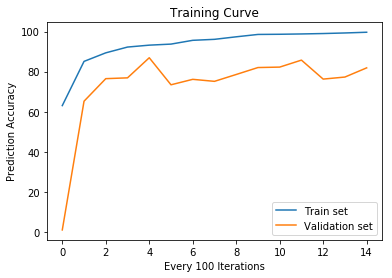

In [250]:
plt.plot(train_curve,label = "Train set")
plt.plot(val_curve,label= "Validation set")
plt.title('Training Curve')
plt.xlabel('Every 100 Iterations')
plt.ylabel('Prediction Accuracy')
plt.legend()

In [215]:
cor_clf,incor_clf = cor_incor_clf(val_loader, model)

In [226]:
print('Correct:\n',cor_clf[:3])
print('--'*58)
print('Incorrect:\n',incor_clf[:3])


Correct:
 ['I would have liked to give this movie a zero but that wasn\'t an option!! This movie sucks!!! The women cannot act. i should have known it was gonna suck when i saw Bobby Brown. Nobody in my house could believe i hadn\'t changed the channel after the first 15 minutes. the idea of black females as gunslingers in the western days is ridiculous. it\'s not just a race thing, it\'s also a gender. the combination of the two things is ridiculous.i am sorry because some of the people in the movie aren\'t bad actors/actresses but the movie itself was awful. it was not credible as a movie. it might be \'entertaining\' to a certain group of people but i am not in that group. lol. and using a great line from a great, great movie..."that\'s all I have to say about that."', "It's a waist to indulge such great actors in such a weak and boring movie. Besides all the unanswered questions posted in the other comments, what's so difficult about capturing the robbers? Just eliminate the bank w